In [28]:
%load_ext rpy2.ipython
from IPython.display import FileLink

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R
library(ggplot2)
library(tidyr); library(magrittr)


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [46]:
%%R
data = data.frame(Day = c(0, 1, 3, 7, 14, 30),
                  xylose = c(100, 34.7, 36, 39.3, 31.1, 29),
                  cellulose = c(100, NA, 88.7, 78.8, 62.4, 39.8)) %>%
    gather(Substrate, "Percent left", -Day) %>%
    na.omit
    
data

   Day Substrate Percent left
1    0    xylose        100.0
2    1    xylose         34.7
3    3    xylose         36.0
4    7    xylose         39.3
5   14    xylose         31.1
6   30    xylose         29.0
7    0 cellulose        100.0
9    3 cellulose         88.7
10   7 cellulose         78.8
11  14 cellulose         62.4
12  30 cellulose         39.8


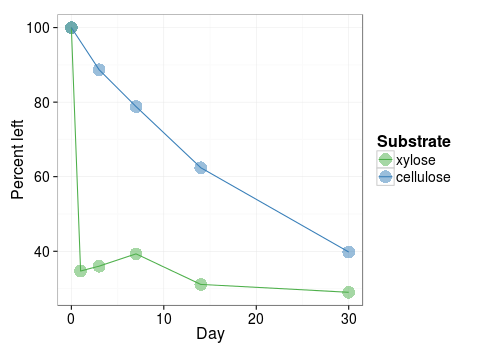

In [49]:
%%R -h 350
p = ggplot(data, aes(x = Day, y = `Percent left`, color = Substrate))

p = p + geom_point(size = 6, alpha = 0.5)
p = p + geom_line()
p = p + labs(x = "Day")
p = p + scale_color_manual(values = c("#4daf4a", "#377eb8"))
p = p + theme_bw()
p = p + theme(axis.text = element_text(size = 14),
              axis.title = element_text(size = 16), 
              legend.text = element_text(size = 14), 
              legend.title = element_text(size = 16))

p

In [50]:
%%R
ggsave("figs/13C_chart.pdf", p, w = 6, h = 4) 

In [51]:
FileLink("figs/13C_chart.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/13C_chart.pdf